In [2]:
import json
import sys
import numpy as np
from datetime import datetime

time_format = '%Y-%m-%dT%H:%M:%SZ'

allRuns = ['config_3/results_parsec_run1.json', 'config_3/results_parsec_run2.json', 'config_3/results_parsec_run3.json']
total_times = np.zeros((3,7))
for run in allRuns:
    file = open(run, 'r')
    json_file = json.load(file)
    start_times = []
    completion_times = []
    names = []

    pos = allRuns.index(run)
    
    for item in json_file['items']:
        name = item['status']['containerStatuses'][0]['name']
        names.append(name)
        print("Job: ", str(name))
        if str(name) != "memcached":
            try:
                start_time = datetime.strptime(
                        item['status']['containerStatuses'][0]['state']['terminated']['startedAt'],
                        time_format)
                completion_time = datetime.strptime(
                        item['status']['containerStatuses'][0]['state']['terminated']['finishedAt'],
                        time_format)
                print("Job time: ", completion_time - start_time)
                start_times.append(start_time)
                completion_times.append(completion_time)
            except KeyError:
                print("Job {0} has not completed....".format(name))
                sys.exit(0)

    if len(start_times) != 6 and len(completion_times) != 6:
        print("You haven't run all the PARSEC jobs. Exiting...")
        sys.exit(0)
        
    total_times[pos,0:6] = [(x - y).total_seconds() for x,y in zip(completion_times, start_times)]
    total_times[pos,-1] = (max(completion_times) - min(start_times)).total_seconds()
    #print(names)
    #print(total_times)
    print("Total time: {0}".format(max(completion_times) - min(start_times)))
    print("-----------")
    file.close()
    print((max(completion_times) - min(start_times)).total_seconds())
    
# Results for part 3a
print(total_times)
print(names)
means = np.mean(total_times,0)
print(means)
std = np.std(total_times,0)
print(std)


Job:  parsecblackscholes
Job time:  0:01:27
Job:  parseccanneal
Job time:  0:03:22
Job:  parsecdedup
Job time:  0:01:21
Job:  parsecferret
Job time:  0:05:08
Job:  parsecfreqmine
Job time:  0:01:54
Job:  parsec-splash2x-fft
Job time:  0:02:03
Job:  memcached
Total time: 0:07:08
-----------
428.0
Job:  parsecblackscholes
Job time:  0:01:27
Job:  parseccanneal
Job time:  0:03:00
Job:  parsecdedup
Job time:  0:01:35
Job:  parsecferret
Job time:  0:05:20
Job:  parsecfreqmine
Job time:  0:02:08
Job:  parsec-splash2x-fft
Job time:  0:01:40
Job:  memcached
Total time: 0:07:10
-----------
430.0
Job:  parsecblackscholes
Job time:  0:01:27
Job:  parseccanneal
Job time:  0:03:09
Job:  parsecdedup
Job time:  0:01:38
Job:  parsecferret
Job time:  0:05:18
Job:  parsecfreqmine
Job time:  0:01:53
Job:  parsec-splash2x-fft
Job time:  0:01:50
Job:  memcached
Total time: 0:06:52
-----------
412.0
[[ 87. 202.  81. 308. 114. 123. 428.]
 [ 87. 180.  95. 320. 128. 100. 430.]
 [ 87. 189.  98. 318. 113. 110. 4

In [44]:
423/60

7.05

In [3]:
# Plot diagram for memcached indicating when each job was deployed: 
import pandas as pd
base_path = 'config_3/memcached_run'
run_results = []
run_achieved_qps = []
# Load each run's results
nRuns =  3 
for i in range(1, nRuns+1):
    data = pd.read_csv(base_path + str(i) + '.raw' ,delim_whitespace=True)
    res = list(data['p95'])
    qps = list(data['QPS'])
    run_results.append(res)
    run_achieved_qps.append(qps)
    

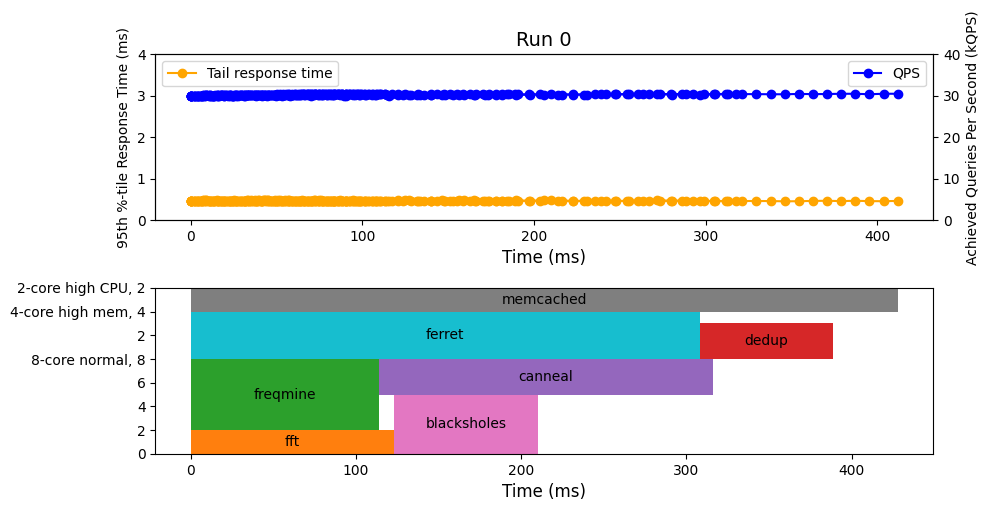

In [49]:
import math
import matplotlib.pyplot as plt
i = 0
#for i in range(1, nRuns+1):
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5),dpi=100)

# First plot:
resultsTime = [item for item in run_results[i] if not(math.isnan(item)) == True]
resultsQPS = [item for item in run_achieved_qps[i] if not(math.isnan(item)) == True]
time = np.linspace(start=0, stop=total_times[-1], num=len(resultsTime))

ax[0].plot(time,np.array(resultsTime)/1000.0, color = "orange",marker = "o")
ax[0].set_xlabel("Time (ms)", fontsize = 12)
ax[0].set_ylabel("95th %-tile Response Time (ms)", fontsize = 10)
ax2 = ax[0].twinx()
ax2.plot(time,np.array(resultsQPS)/1000.0, color = "blue", marker = "o")
ax2.set_ylabel("Achieved Queries Per Second (kQPS)", fontsize = 10)
y2labs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k']
ax2.set_yticks(range(0, 50, 10))
y1labs = ['0', '1','2','3','4','5','6','7','8','9','10']
ax[0].set_yticks(range(0,5,1))
ax[0].legend(['Tail response time'], fontsize=10, loc='upper left')
ax2.legend(['QPS'], fontsize=10,loc='upper right')


# Second plot:
timesJobs = total_times[i]
ax[1].set_xlabel("Time (ms)", fontsize = 12)
ax[1].set_ylim(0,14)
ax[1].set_yticks([0,2,4,6,8,10,12,14])
ylabs_parsec = ['0','2','4','6','8-core normal, 8', '2','4-core high mem, 4', '2-core high CPU, 2']
ax[1].set_yticklabels(ylabs_parsec)
ax[1].set_xticks([0,100,200,300,400])
#ax[1].set_xlim(0,450)
#['parsecblackscholes', 'parseccanneal', 'parsecdedup', 'parsecferret', 'parsecfreqmine', 'parsec-splash2x-fft', 'memcached']
#Memcached
ax[1].broken_barh([(0,timesJobs[-1])],(12,2), facecolors = 'tab:gray')
ax[1].annotate('memcached',(timesJobs[-1]/2,13),color='black', horizontalalignment='center', verticalalignment='center')
#FFT n=5
ax[1].broken_barh([(0,timesJobs[5])], (0,2), facecolors = 'tab:orange')
ax[1].annotate('fft',(timesJobs[5]/2, 1), color = 'black', horizontalalignment='center', verticalalignment='center')
#Freqmine n=4
ax[1].broken_barh([(0,timesJobs[4])], (2,6), facecolors = 'tab:green')
ax[1].annotate('freqmine',(timesJobs[4]/2, 5), color = 'black', horizontalalignment='center', verticalalignment='center')
#Canneal n=1
ax[1].broken_barh([(timesJobs[4],timesJobs[1])], (5,3), facecolors = 'tab:purple')
ax[1].annotate('canneal',( (2*timesJobs[4]+timesJobs[1])/2, 6.5), color = 'black', horizontalalignment='center', verticalalignment='center')
#Blackscholes n=0
ax[1].broken_barh([(timesJobs[5],timesJobs[0])], (0,5), facecolors = 'tab:pink')
ax[1].annotate('blacksholes',((2*timesJobs[5]+timesJobs[0])/2, 2.5), color = 'black', horizontalalignment='center', verticalalignment='center')
#Ferret n=3
ax[1].broken_barh([(0,timesJobs[3])], (8,4), facecolors = 'tab:cyan')
ax[1].annotate('ferret',((timesJobs[3])/2, 10), color = 'black', horizontalalignment='center', verticalalignment='center')
#Dedup n=2
ax[1].broken_barh([(timesJobs[3],timesJobs[2])], (8,3), facecolors = 'tab:red')
ax[1].annotate('dedup',((timesJobs[2]+2*timesJobs[3])/2, 9.5), color = 'black', horizontalalignment='center', verticalalignment='center')


plt.title('Run ' + str(i), fontsize = 14)
plt.tight_layout()

plt.savefig("run" + str(i) + ".pdf", bbox_inches = "tight")
#plt.show()

6.333333333333333

In [ ]:
'''
for key in run_results:
    arrays_lat = [np.array(x) for x in run_results[key]]
    arrays_lat = np.array(arrays_lat) / 1000.0
    arrays_qps = [np.array(x) for x in run_achieved_qps[key]]
    arrays_qps = np.array(arrays_qps) / 1000.0

    means_lat = np.array([np.mean(k) for k in zip(*arrays_lat)])
    errors_lat = np.array([np.std(k) for k in zip(*arrays_lat)])

    means_qps = np.array([np.mean(k) for k in zip(*arrays_qps)])
    errors_qps = np.array([np.std(k) for k in zip(*arrays_qps)])

    means_qps = means_qps[positions]
    means_lat = means_lat[positions]
    errors_lat = errors_lat[positions] 
    errors_qps = errors_qps[positions]

    plt.errorbar(means_qps, means_lat, yerr = errors_lat, xerr = errors_qps,
                 marker='o', markerfacecolor = 'none', capsize=4, label=key)
                   #errorevery=(1,1))


handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)

# Style figure
plt.title("Mean response time of memcached over a range of queries per second and under \n the influence of various types of interference [over 3 runs, error bars 1SD]",
         fontsize=12)
xlabs = ['0k', '5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k','75k','80k']
plt.xticks(range(0, 81, 5), xlabs)
ylabs = ['0', '1','2','3','4','5','6','7','8','9','10']
plt.yticks(range(0,11,1), ylabs)
ylabel = '95th %-tile Response Time (ms)'
xlabel = 'Achieved Queries Per Second (QPS)'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
labels[6] = "no interference"
#specify order of items in legend
order = [0,2,4,5,1,3,6]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10, title="Type of interference") 
#plt.legend(legend, fontsize=10, title="Type of interference")
plt.grid(True, color='lightgray', linestyle='--', linewidth=1)
#fig_ax.set_title('Tail latency for different interferences at memcached', fontsize = 14)
# Save plot
plt.tight_layout()
plt.savefig("run" + i + ".pdf")
'''